## ✅ ANN Classification Tutorial Code using MLPClassifier

# 📌 Step 1: Import required libraries

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score


# 📌 Step 2: Load and preprocess the dataset

In [45]:
df = pd.read_excel("Collected Data_PS_GitHub upload.xlsx")
df = df.iloc[:, 1:7]  # Columns B to G
df.columns = ['Slope_Angle', 'CbygammaH', 'phi', 'kh', 'kvr', 'fmp']

# 🔁 Convert regression target to classification (Safe vs Unsafe)
df['Class'] = df['fmp'].apply(lambda x: 1 if x >= 1.5 else 0)  # 1 = Safe, 0 = Unsafe
df.drop(columns='fmp', inplace=True)

# 📌 Step 3: Split features and target

In [48]:
X = df.drop('Class', axis=1)
y = df['Class']

# ✨ Step 4: Standardize the input features

In [51]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 📌 Step 5: Train-Test Split (for final model evaluation)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)



# 📌 Step 6: Define parameter grid for hyperparameter tuning

In [57]:
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'learning_rate_init': [0.001, 0.01],
    'batch_size': [32, 64],
    # 'max_iter': [200] %Will show a convergence error
     'max_iter': [300, 500] # ⬅️ Increased iterations
}

# 📌 Step 7: Initialize the MLPClassifier and GridSearchCV

In [60]:
mlp = MLPClassifier(random_state=42)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=cv, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 48 candidates, totalling 240 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=MLPClassifier(random_state=42), n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh'], 'batch_size': [32, 64],
                         'hidden_layer_sizes': [(50,), (100,), (50, 50)],
                         'learning_rate_init': [0.001, 0.01],
                         'max_iter': [300, 500], 'solver': ['adam']},
             scoring='accuracy', verbose=1)

# The warning you're seeing:

ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
means that the MLPClassifier did not reach its optimal weights within the default 200 training epochs (or iterations).

# ✅ Why This Happens:
MLP (Multilayer Perceptron) uses an iterative optimizer (like stochastic gradient descent or Adam).

If the loss does not reach a stable value (i.e., converges) within the given number of max_iter, it throws this warning.



# 🔧 How to Fix or Handle It:
You have two main options:

Option 1: Increase max_iter
Since ANN models often need more iterations to converge, set max_iter to a higher value in your param_grid:
'max_iter': [300, 500]


Option 2: Enable Early Stopping
Let the model stop automatically when it sees no improvement for several iterations:
mlp = MLPClassifier(random_state=42, early_stopping=True, n_iter_no_change=10)
This avoids unnecessary training and helps convergence.
                                                            

# ✅ Step 8: Best Parameters and Model Evaluation

In [65]:
print("Best Parameters from Grid Search:")
print(grid_search.best_params_)

best_mlp = grid_search.best_estimator_


Best Parameters from Grid Search:
{'activation': 'tanh', 'batch_size': 32, 'hidden_layer_sizes': (50, 50), 'learning_rate_init': 0.001, 'max_iter': 300, 'solver': 'adam'}


# 📌 Step 9: Predict and evaluate on test set

In [67]:
y_pred = best_mlp.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1882
           1       0.99      0.99      0.99      1944

    accuracy                           0.99      3826
   macro avg       0.99      0.99      0.99      3826
weighted avg       0.99      0.99      0.99      3826



# 📊 Step 10: Confusion Matrix Visualization

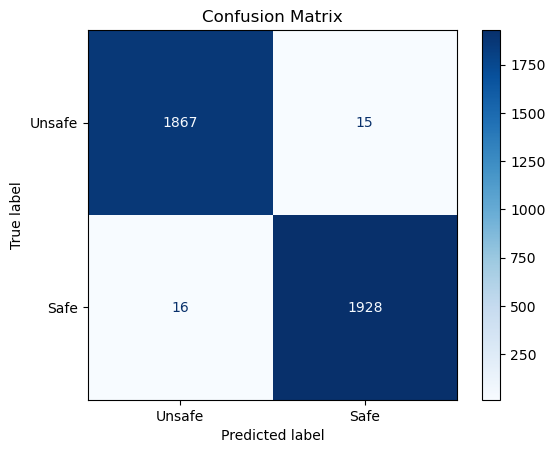

In [69]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Unsafe', 'Safe'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


# 📈 Step 11: Cross-validated accuracy

In [71]:
cv_scores = cross_val_score(best_mlp, X_scaled, y, cv=5, scoring='accuracy')
print("Cross-validated Accuracy Scores:", np.round(cv_scores, 4))
print("Average Accuracy:", round(np.mean(cv_scores), 4))


Cross-validated Accuracy Scores: [0.9728 0.9817 0.9668 0.9861 0.9725]
Average Accuracy: 0.976


# Hope this notebook has been helpful!
 
Created by: Abdul Waris, PMRF, IIT Hyderabad

For PG students and PhD Scholars at NIT Srinagar (Five Day Workshop on Introduction to FEM and ML in Geotechnical Engineering)